<img src="https:////scontent.fhan9-1.fna.fbcdn.net/v/t39.30808-6/339122927_1347965006053141_1323654940389313527_n.jpg?_nc_cat=1&ccb=1-7&_nc_sid=5f2048&_nc_ohc=RxgK2wQBdfIAX9RQ12B&_nc_ht=scontent.fhan9-1.fna&oh=00_AfBOx5rlfgrGYgo-aGWT946hcP3U0n2WBaCcYTFM6OyZww&oe=65506ED3"
    style="width:500px; float: right; margin: 0 40px 40px 40px;"></img>

##  PHÂN TÍCH DỮ LIỆU PAGE [đài phát thanh](https://www.facebook.com/daiphatthanh.sound)
## Bài phân viết phân tích page được viết trong [NOTION](https://www.notion.so/Data-Analyze-Page-Facebook-6ba0209824a04832b291f084f583f6b9).

Phân tích dữ liệu: Một số câu hỏi tiềm năng để phân tích như: Đâu là bài viết
có lượt tương tác lớn nhất trong bộ dữ liệu?; Các mốc thời gian trong ngày mà
Fanpage thường xuyên đăng bài viết?; Số lượt tương tác trong các bài đăng thay
đổi như thế nào?; Đâu là các từ khóa xuất hiện nhiều nhất trong các bài đăng được
thu thập?; Sự tương quan giữa số lượng reactions với các trường khác như số lượng
bình luận, độ dài bài viết?; v.v. Ngoài ra, nếu có dữ liệu từ hai trang Fanpage mà
giả sử là hai trang tin tức, sự tương quan giữa nội dung của hai trang Fanpage như
thế nào?; v.v.

In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [177]:
df = pd.read_csv(r'Data\data.csv')

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   post_id             115 non-null    int64 
 1   text                115 non-null    object
 2   time                115 non-null    object
 3   timestamp           115 non-null    int64 
 4   images_description  115 non-null    object
 5   comments            115 non-null    int64 
 6   shares              115 non-null    int64 
 7   comments_full       115 non-null    object
 8   reactors            115 non-null    object
 9   reactions           115 non-null    object
 10  reaction_count      115 non-null    int64 
dtypes: int64(5), object(6)
memory usage: 10.0+ KB


In [179]:
df.head(3)

,post_id,text,time,timestamp,images_description,comments,shares,comments_full,reactors,reactions,reaction_count
0,907756300716759,Vũ Trụ Người Nhện của Sony chào đón phim dành ...,2023-11-15 22:02:13,1700060533,[],0,0,[],[],"{'thích': 11, 'yêu thích': 2}",13
1,907691994056523,Khi Từng Quen còn chưa hết hot và Bé Ơi Từ Từ ...,2023-11-15 21:30:56,1700058656,[],26,36,"[{'comment_id': '361069166437409', 'comment_ur...",[],"{'thích': 887, 'yêu thích': 402, 'haha': 3, 'w...",1304
2,907708237388232,Ca khúc có giai điệu cực đáng iu cho mùa noel ...,2023-11-15 20:32:56,1700055176,[],16,7,"[{'comment_id': '603538661830356', 'comment_ur...","[{'name': 'Bảo Ngọc', 'link': 'https://faceboo...","{'thích': 180, 'yêu thích': 52, 'haha': 1, 'th...",234


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

Phân tích lượt react theo từng ngày.

In [181]:
post_df_full1 = df
post_df_full1[['post_id','reactions']]

,post_id,reactions
0,907756300716759,"{'thích': 11, 'yêu thích': 2}"
1,907691994056523,"{'thích': 887, 'yêu thích': 402, 'haha': 3, 'w..."
2,907708237388232,"{'thích': 180, 'yêu thích': 52, 'haha': 1, 'th..."
3,907705917388464,"{'thích': 8236, 'yêu thích': 260, 'haha': 3898..."
4,907693637389692,"{'thích': 2235, 'yêu thích': 26, 'haha': 2289,..."
...,...,...
110,903953911096998,"{'thích': 3180, 'yêu thích': 13, 'haha': 7, 't..."
111,903943584431364,"{'thích': 5222, 'yêu thích': 119, 'haha': 2005..."
112,903846634441059,"{'thích': 3722, 'yêu thích': 87, 'haha': 5509,..."
113,903783757780680,"{'thích': 5926, 'yêu thích': 37, 'haha': 15854..."


In [185]:
post_df_full2=post_df_full1[['time','timestamp' ,'reaction_count']]
post_df_full2

,time,timestamp,reaction_count
0,2023-11-15 22:02:13,1700060533,13
1,2023-11-15 21:30:56,1700058656,1304
2,2023-11-15 20:32:56,1700055176,234
3,2023-11-15 20:06:52,1700053612,12435
4,2023-11-15 19:38:51,1700051931,4565
...,...,...,...
110,2023-11-08 18:24:26,1699442666,3201
111,2023-11-08 17:56:14,1699440974,7399
112,2023-11-08 12:34:41,1699421681,9349
113,2023-11-08 09:30:34,1699410634,23534


In [198]:
dates=post_df_full2['timestamp'].to_list()
y=post_df_full2['reaction_count'].to_list()
dates.reverse()
y.reverse()
print(len(dates),len(y))
print(dates)
print(y)

115 115
[1699372299, 1699410634, 1699421681, 1699440974, 1699442666, 1699444801, 1699448408, 1699450235, 1699450865, 1699500764, 1699503589, 1699508623, 1699512081, 1699515076, 1699515783, 1699521122, 1699528389, 1699533092, 1699534805, 1699536648, 1699538406, 1699539736, 1699540323, 1699541488, 1699542507, 1699596648, 1699599961, 1699614004, 1699619543, 1699621996, 1699623657, 1699627159, 1699627910, 1699629301, 1699630239, 1699631110, 1699632001, 1699634794, 1699638191, 1699668952, 1699670757, 1699672912, 1699674863, 1699676326, 1699680163, 1699682190, 1699684155, 1699684635, 1699688941, 1699689639, 1699697065, 1699705803, 1699707605, 1699708325, 1699709447, 1699710314, 1699711239, 1699712156, 1699712232, 1699712293, 1699712341, 1699712415, 1699712510, 1699712685, 1699712818, 1699712904, 1699713015, 1699713063, 1699713344, 1699715297, 1699715590, 1699717361, 1699758749, 1699761080, 1699767982, 1699771423, 1699790574, 1699792233, 1699794049, 1699795803, 1699797184, 1699801786, 1699805

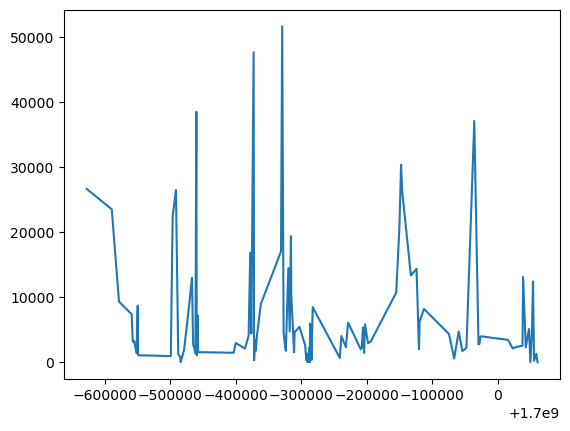

In [188]:
plt.plot(dates,y)
plt.show()


In [189]:


post_df_full1['reactions'] = post_df_full1['reactions'].apply(lambda x : dict(eval(x)) )
post_df_full_reactions = post_df_full1['reactions'].apply(pd.Series )

In [192]:

# gộp các cột lại vào dataframe
post_df_full_with_reactions = pd.concat([post_df_full1, post_df_full_reactions], axis=1).drop('reactions', axis=1)
post_df_full_with_reactions[['text','thích','yêu thích','haha','wow','buồn','phẫn nộ','thương thương',
                                 'shares','comments','reaction_count']]


,text,thích,yêu thích,haha,wow,buồn,phẫn nộ,thương thương,shares,comments,reaction_count
0,Vũ Trụ Người Nhện của Sony chào đón phim dành ...,11.0,2.0,NaN,NaN,NaN,NaN,NaN,0,0,13
1,Khi Từng Quen còn chưa hết hot và Bé Ơi Từ Từ ...,887.0,402.0,3.0,1.0,1.0,NaN,10.0,36,26,1304
2,Ca khúc có giai điệu cực đáng iu cho mùa noel ...,180.0,52.0,1.0,NaN,NaN,NaN,1.0,7,16,234
3,Về miền tây ăn đám cưới miệt vườn của Gin Tuấn...,8236.0,260.0,3898.0,4.0,14.0,1.0,22.0,43,329,12435
4,Outfit chuẩn bị ăn cưới miệt vườn của Puka - G...,2235.0,26.0,2289.0,NaN,9.0,NaN,6.0,7,60,4565
...,...,...,...,...,...,...,...,...,...,...,...
110,"THÙY TIÊN DẠO NÀY: COSPLAY CAROL DANVERS, KHOE...",3180.0,13.0,7.0,NaN,NaN,NaN,1.0,1,20,3201
111,CHIẾC BMW TRỊ GIÁ HƠN 4 TỎI ĐƯA G-DRAGON ĐẾN T...,5222.0,119.0,2005.0,19.0,15.0,1.0,18.0,77,376,7399
112,"Talkshow chuyện nhà hot gơn Tây Hồ, vẫn là chủ...",3722.0,87.0,5509.0,3.0,15.0,1.0,12.0,83,119,9349
113,"ĐỘC LẠ DOUYIN TRUNG HOA\n\n""Chàng trai Trung Q...",5926.0,37.0,15854.0,31.0,1667.0,6.0,13.0,121,1316,23534


In [193]:
for i in range(0, len(post_df_full_with_reactions['thích'].values), 1):
    if pd.isna(post_df_full_with_reactions['thích'].values[i]):
        post_df_full_with_reactions['thích'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['yêu thích'].values[i]):
        post_df_full_with_reactions['yêu thích'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['haha'].values[i]):
        post_df_full_with_reactions['haha'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['wow'].values[i]):
        post_df_full_with_reactions['wow'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['buồn'].values[i]):
        post_df_full_with_reactions['buồn'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['phẫn nộ'].values[i]):
        post_df_full_with_reactions['phẫn nộ'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['thương thương'].values[i]):
        post_df_full_with_reactions['thương thương'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['shares'].values[i]):
        post_df_full_with_reactions['shares'].values[i] = 0
    
    if pd.isna(post_df_full_with_reactions['comments'].values[i]):
        post_df_full_with_reactions['comments'].values[i] = 0

post_df_full_with_reactions[['text','thích','yêu thích','haha','wow','buồn','phẫn nộ','thương thương',
                                 'shares','comments','reaction_count']]

,text,thích,yêu thích,haha,wow,buồn,phẫn nộ,thương thương,shares,comments,reaction_count
0,Vũ Trụ Người Nhện của Sony chào đón phim dành ...,11.0,2.0,0.0,0.0,0.0,0.0,0.0,0,0,13
1,Khi Từng Quen còn chưa hết hot và Bé Ơi Từ Từ ...,887.0,402.0,3.0,1.0,1.0,0.0,10.0,36,26,1304
2,Ca khúc có giai điệu cực đáng iu cho mùa noel ...,180.0,52.0,1.0,0.0,0.0,0.0,1.0,7,16,234
3,Về miền tây ăn đám cưới miệt vườn của Gin Tuấn...,8236.0,260.0,3898.0,4.0,14.0,1.0,22.0,43,329,12435
4,Outfit chuẩn bị ăn cưới miệt vườn của Puka - G...,2235.0,26.0,2289.0,0.0,9.0,0.0,6.0,7,60,4565
...,...,...,...,...,...,...,...,...,...,...,...
110,"THÙY TIÊN DẠO NÀY: COSPLAY CAROL DANVERS, KHOE...",3180.0,13.0,7.0,0.0,0.0,0.0,1.0,1,20,3201
111,CHIẾC BMW TRỊ GIÁ HƠN 4 TỎI ĐƯA G-DRAGON ĐẾN T...,5222.0,119.0,2005.0,19.0,15.0,1.0,18.0,77,376,7399
112,"Talkshow chuyện nhà hot gơn Tây Hồ, vẫn là chủ...",3722.0,87.0,5509.0,3.0,15.0,1.0,12.0,83,119,9349
113,"ĐỘC LẠ DOUYIN TRUNG HOA\n\n""Chàng trai Trung Q...",5926.0,37.0,15854.0,31.0,1667.0,6.0,13.0,121,1316,23534


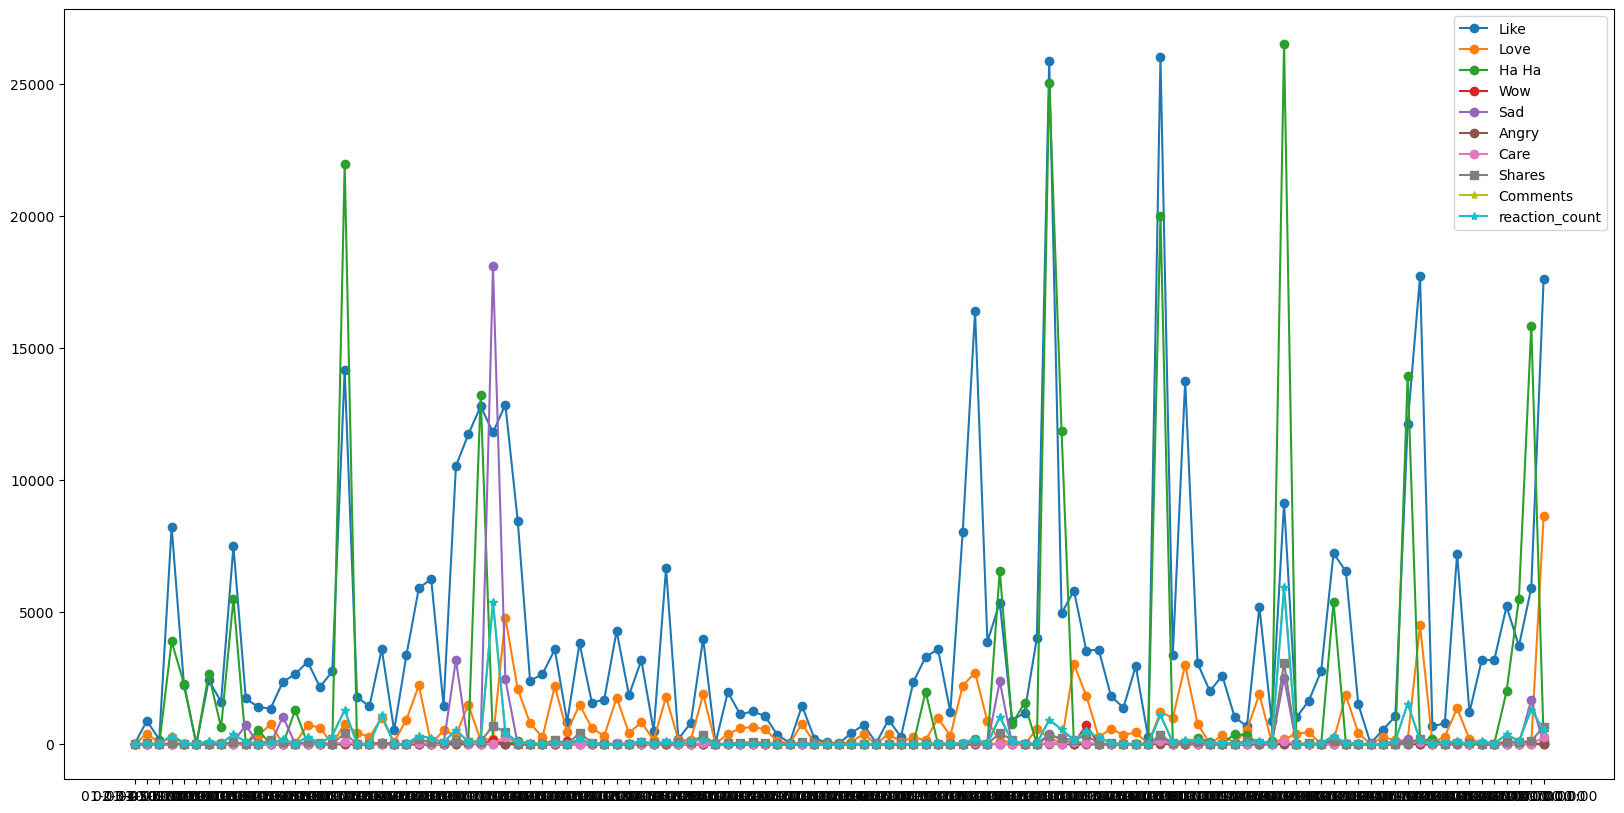

In [194]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['thích'], label = "Like", marker="o")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['yêu thích'], label = "Love", marker="o")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['haha'], label = "Ha Ha", marker="o")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['wow'], label = "Wow", marker="o")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['buồn'], label = "Sad", marker="o")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['phẫn nộ'], label = "Angry", marker="o")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['thương thương'], label = "Care", marker="o")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['shares'], label = "Shares", marker="s")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['comments'], label = "Comments", marker="*")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['comments'], label = "reaction_count", marker="*")

plt.legend()
from matplotlib.dates import DateFormatter
ax.xaxis.set_major_formatter(DateFormatter('%d-%m-%y %H:%M'))
     

In [195]:
# hiểm thị mối quan hệ Like, Love, Ha Ha, Wow, Sad, Angry, Care với cột Share
print(post_df_full_with_reactions[['thích','yêu thích','haha','wow','buồn','phẫn nộ','thương thương']].corrwith(post_df_full_with_reactions['shares']))
     

thích            0.334213
yêu thích        0.184384
haha             0.558554
wow              0.146667
buồn             0.326016
phẫn nộ          0.298898
thương thương    0.478000
dtype: float64


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

 Đâu là bài viết
có lượt tương tác lớn nhất trong bộ dữ liệu?

In [182]:
df.nlargest(1,'reaction_count')

,post_id,text,time,timestamp,images_description,comments,shares,comments_full,reactors,reactions,reaction_count
74,905393644286358,Cảm lạnh những cử chỉ quan tâm dịu dàng của An...,2023-11-11 09:45:57,1699670757,[],922,313,"[{'comment_id': '1276110766411506', 'comment_u...","[{'name': 'Vinh Quang Dương', 'link': 'https:/...","{'thích': 25886, 'yêu thích': 237, 'haha': 250...",51659


- ngày 11-11 có nhiều tương tác.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
Các mốc thời gian trong ngày mà Fanpage thường xuyên đăng bài viết?

Text(0.5, 1.0, 'mốc thời gian đăng bài viết')

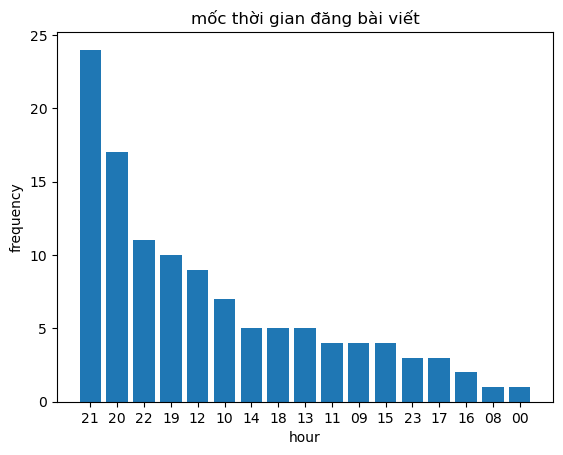

In [ ]:
a = pd.DataFrame({'frequency':df['time'].str[11:13].value_counts()})
plt.bar(x=a.index,height= a['frequency'])
plt.xlabel('hour')
plt.ylabel('frequency')
plt.title('mốc thời gian đăng bài viết')

 Số lượt tương tác trong các bài đăng thay
đổi như thế nào?

 Đâu là các từ khóa xuất hiện nhiều nhất trong các bài đăng được
thu thập?;

Sự tương quan giữa số lượng reactions với các trường khác như số lượng
bình luận, độ dài bài viết?